<a href="https://colab.research.google.com/github/RKashyap404/My-Projects/blob/main/Statistical_analysis_synthetic_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import random
from faker import Faker

# Initialize Faker with US locale
fake = Faker('en_US')

# Parameters for data generation
num_records = 100000
coverage_types = ['Bronze', 'Silver', 'Gold', 'Platinum']
insurance_companies = ['HealthPartners', 'Medica', 'BlueCross', 'UCare', 'PreferredOne']
plan_types = ['HMO', 'PPO', 'EPO', 'POS']
network_types = ['In-Network', 'Out-of-Network']
deductible_types = ['Individual', 'Family']
premium_ranges = {'Bronze': (200, 400), 'Silver': (400, 600), 'Gold': (600, 800), 'Platinum': (800, 1000)}
deductible_ranges = {'Bronze': (4000, 7000), 'Silver': (2500, 4000), 'Gold': (1000, 2500), 'Platinum': (500, 1000)}
out_of_pocket_ranges = {'Bronze': (7000, 8000), 'Silver': (5000, 7000), 'Gold': (3000, 5000), 'Platinum': (2000, 3000)}
coinsurance_rates = [0.10, 0.20, 0.30, 0.40]
copay_ranges = {'Primary Care': (10, 30), 'Specialist': (40, 100), 'Emergency Room': (150, 500)}

# Generate synthetic data
data = []

for _ in range(num_records):
    coverage_type = random.choice(coverage_types)
    record = {
        'Policy_ID': fake.unique.uuid4(),
        'Insurance_Company': random.choice(insurance_companies),
        'Plan_Type': random.choice(plan_types),
        'Coverage_Type': coverage_type,
        'Premium': round(random.uniform(*premium_ranges[coverage_type]), 2),
        'Deductible': random.randint(*deductible_ranges[coverage_type]),
        'Out_of_Pocket_Maximum': random.randint(*out_of_pocket_ranges[coverage_type]),
        'Coinsurance': random.choice(coinsurance_rates),
        'Primary_Care_Copay': random.randint(*copay_ranges['Primary Care']),
        'Specialist_Copay': random.randint(*copay_ranges['Specialist']),
        'Emergency_Room_Copay': random.randint(*copay_ranges['Emergency Room']),
        'Prescription_Coverage': random.choice([True, False]),
        'Network_Type': random.choice(network_types),
        'Deductible_Type': random.choice(deductible_types),
        'Policy_Holder_Name': fake.name(),
        'Policy_Holder_Age': random.randint(18, 65),
        'Policy_Holder_Location': 'Minnesota',
        'Start_Date': fake.date_this_decade(),
        'End_Date': fake.date_between(start_date='+1y', end_date='+5y'),
        'Pre_existing_Condition': random.choice([True, False]),
        'Telemedicine_Coverage': random.choice([True, False]),
        'Mental_Health_Coverage': random.choice([True, False]),
        'Dental_Coverage': random.choice([True, False]),
        'Vision_Coverage': random.choice([True, False]),
        'Maternity_Coverage': random.choice([True, False])
    }
    data.append(record)

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('minnesota_health_insurance_policies_large.csv', index=False)

print("Large synthetic dataset generated and saved to 'minnesota_health_insurance_policies_large.csv'")


Large synthetic dataset generated and saved to 'minnesota_health_insurance_policies_large.csv'


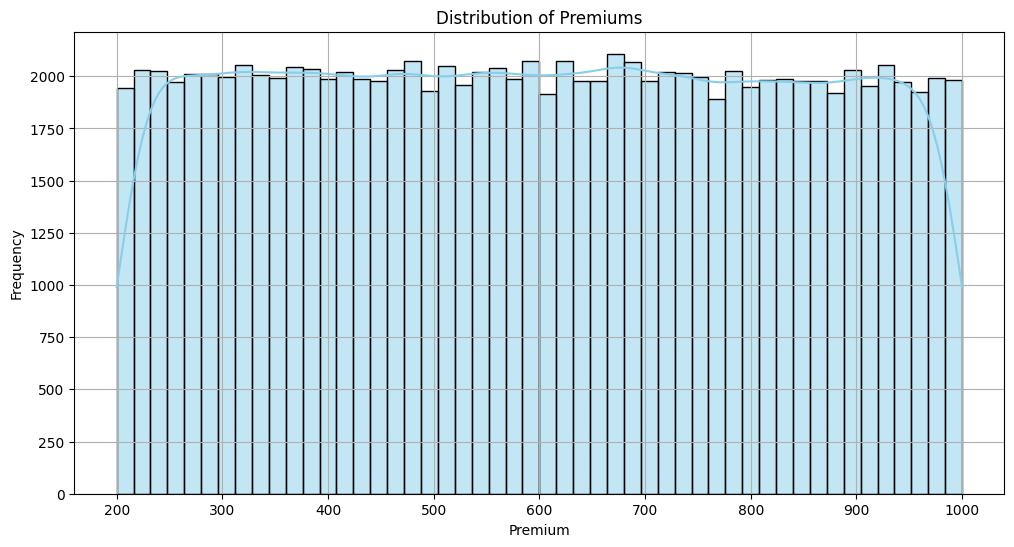

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.histplot(df['Premium'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Premiums')
plt.xlabel('Premium')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [2]:
pip install Faker


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.2 MB/s eta 0:00:00


<ipython-input-5-2f12b1db1ef7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Coverage_Type', y='Premium', data=df, palette='Set2')


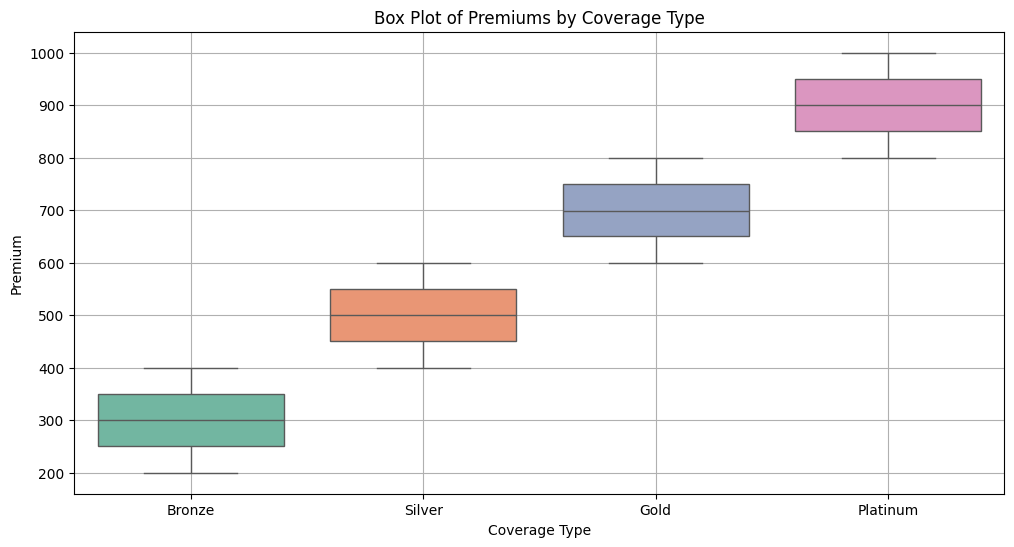

In [5]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Coverage_Type', y='Premium', data=df, palette='Set2')
plt.title('Box Plot of Premiums by Coverage Type')
plt.xlabel('Coverage Type')
plt.ylabel('Premium')
plt.grid(True)
plt.show()


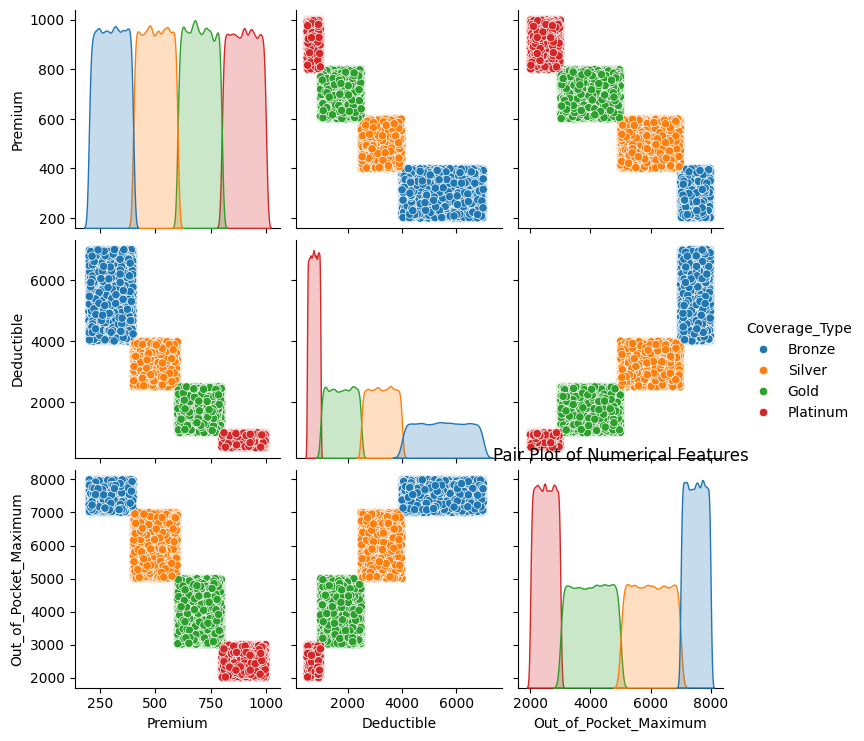

In [16]:
sns.pairplot(df[['Premium', 'Deductible', 'Out_of_Pocket_Maximum', 'Coverage_Type']], diag_kind='kde', hue='Coverage_Type')
plt.title('Pair Plot of Numerical Features')
plt.show()

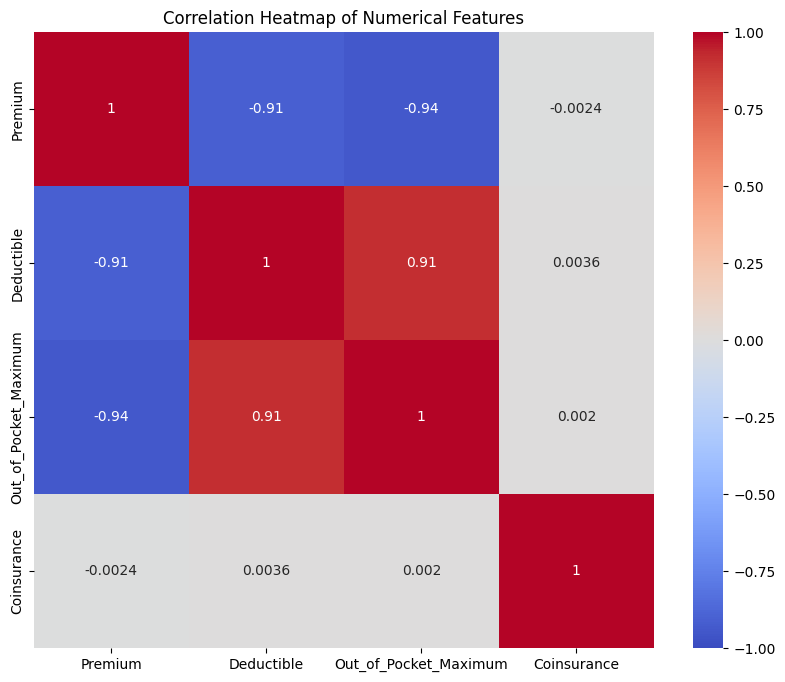

In [7]:
plt.figure(figsize=(10, 8))
corr = df[['Premium', 'Deductible', 'Out_of_Pocket_Maximum', 'Coinsurance']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


<ipython-input-8-633c3aabf782>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Insurance_Company', y='Premium', data=df, palette='tab10')


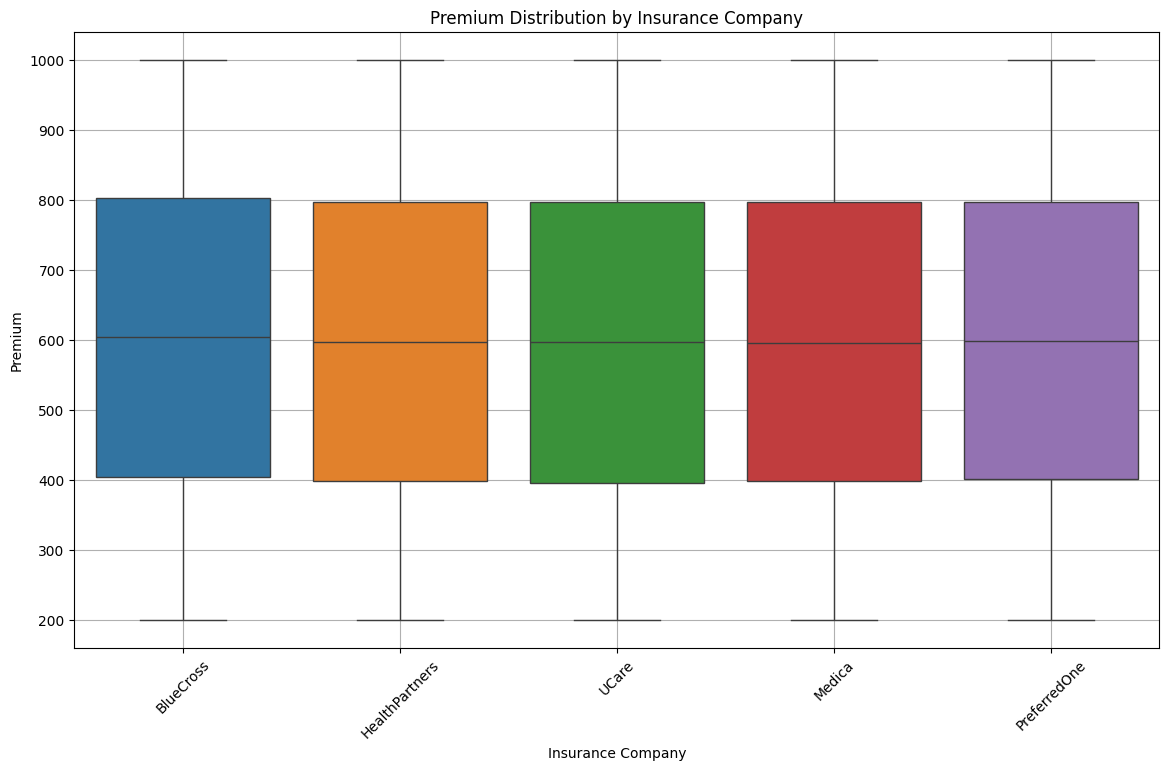

In [8]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Insurance_Company', y='Premium', data=df, palette='tab10')
plt.title('Premium Distribution by Insurance Company')
plt.xlabel('Insurance Company')
plt.ylabel('Premium')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<ipython-input-9-70f004adcd6a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coverage_counts.index, y=coverage_counts.values, palette='viridis')


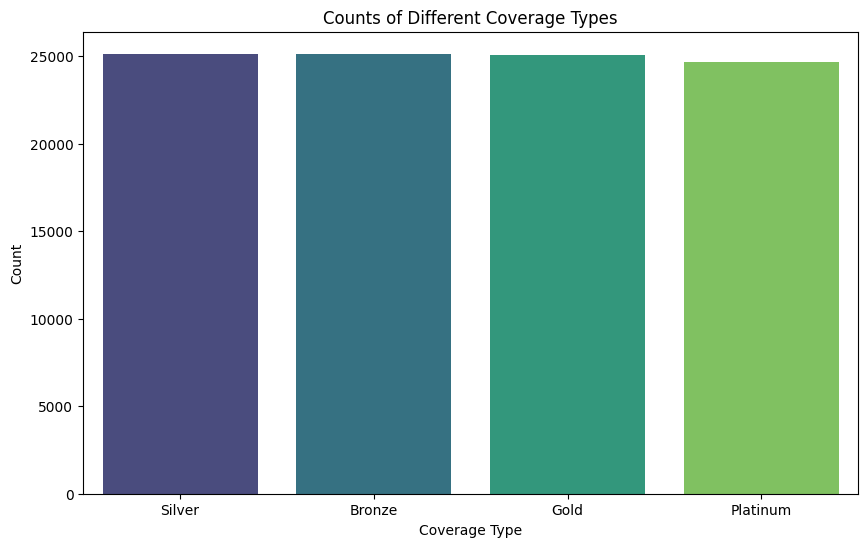

In [9]:
plt.figure(figsize=(10, 6))
coverage_counts = df['Coverage_Type'].value_counts()
sns.barplot(x=coverage_counts.index, y=coverage_counts.values, palette='viridis')
plt.title('Counts of Different Coverage Types')
plt.xlabel('Coverage Type')
plt.ylabel('Count')
plt.show()


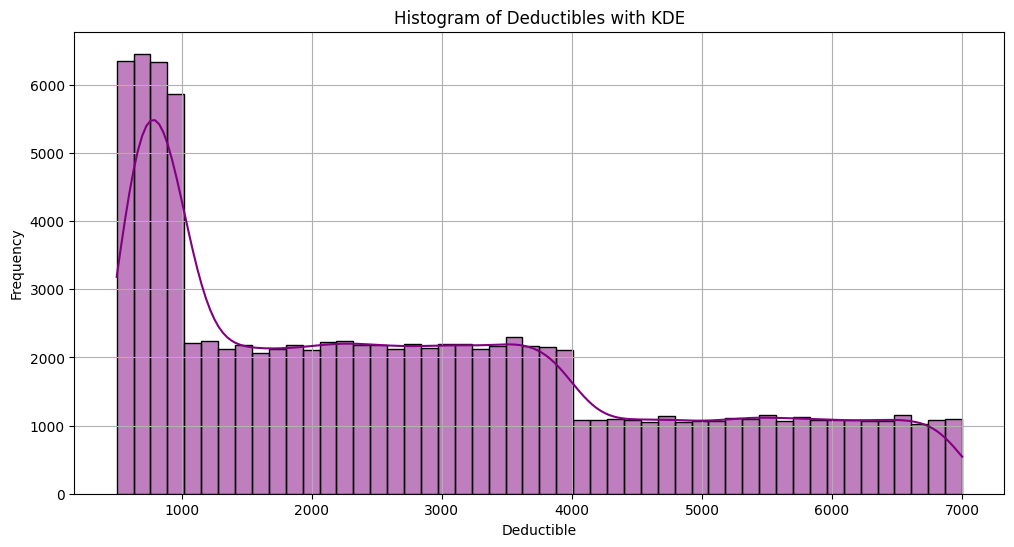

In [10]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Deductible'], kde=True, bins=50, color='purple')
plt.title('Histogram of Deductibles with KDE')
plt.xlabel('Deductible')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


<ipython-input-11-e4b55aec5efc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coverage_Type', y='Count', data=coverage_counts, palette='pastel')


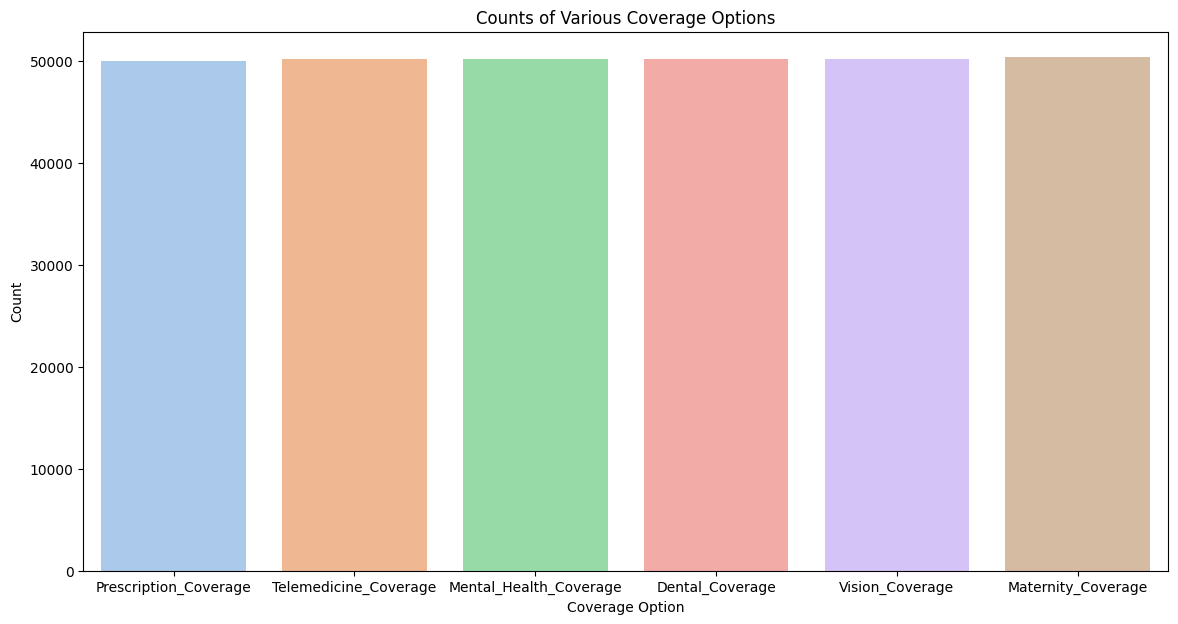

In [11]:
coverage_options = df[['Prescription_Coverage', 'Telemedicine_Coverage', 'Mental_Health_Coverage', 'Dental_Coverage', 'Vision_Coverage', 'Maternity_Coverage']]
coverage_counts = coverage_options.sum().reset_index()
coverage_counts.columns = ['Coverage_Type', 'Count']

plt.figure(figsize=(14, 7))
sns.barplot(x='Coverage_Type', y='Count', data=coverage_counts, palette='pastel')
plt.title('Counts of Various Coverage Options')
plt.xlabel('Coverage Option')
plt.ylabel('Count')
plt.show()


<ipython-input-12-3a7b08f5754b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Coverage_Type', y='Deductible', data=df, palette='coolwarm')


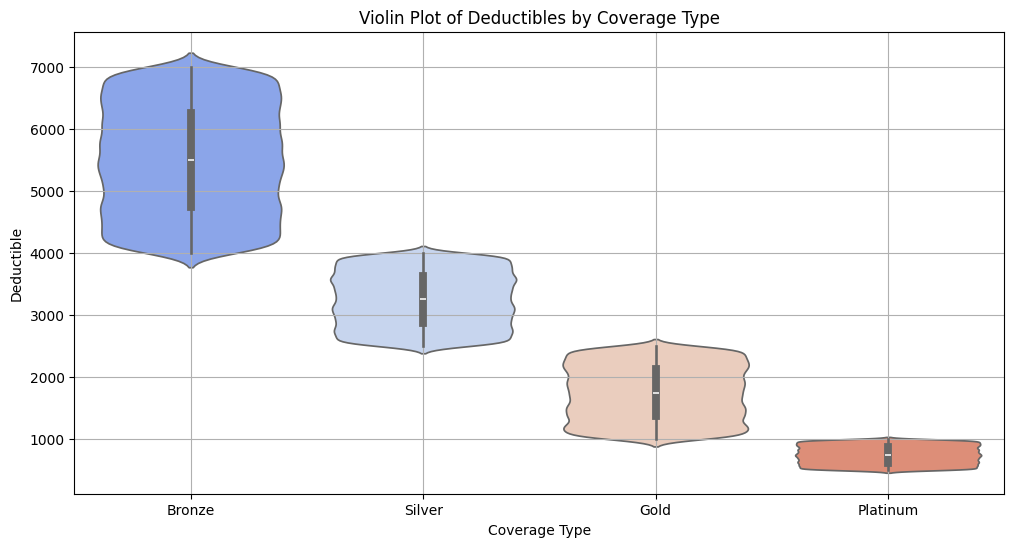

In [12]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Coverage_Type', y='Deductible', data=df, palette='coolwarm')
plt.title('Violin Plot of Deductibles by Coverage Type')
plt.xlabel('Coverage Type')
plt.ylabel('Deductible')
plt.grid(True)
plt.show()


In [13]:
import plotly.express as px

fig = px.scatter_3d(df, x='Premium', y='Deductible', z='Out_of_Pocket_Maximum',
                    color='Coverage_Type', symbol='Insurance_Company',
                    title='3D Scatter Plot of Premium, Deductible, and Out-of-Pocket Maximum',
                    labels={'Premium': 'Premium', 'Deductible': 'Deductible', 'Out_of_Pocket_Maximum': 'Out-of-Pocket Maximum'})
fig.update_layout(scene=dict(xaxis_title='Premium', yaxis_title='Deductible', zaxis_title='Out-of-Pocket Maximum'))
fig.show()
